# Numerical Exercises 09

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

## Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

## Solution

### Genetic Algorithm

Genetic algorithms are a class of optimization algorithms inspired by the process of natural selection. They work by evolving a population of candidate solutions to a problem over successive generations simulating crossing, mutation, and selection processes. The genetic algorithm I implemented consists of the following steps:

1. Initialization: Create an initial random population of candidate solutions (paths).
2. Evaluation: Calculate the fitness of each candidate solution based on the cost function (TSP path length).
3. Selection: Select candidate solutions for reproduction based on their fitness.
4. Crossover: Combine pairs of selected candidates to create offspring.
5. Mutation: Apply random mutations to the offspring to introduce diversity.
6. Replacement: Replace the old population with the new one.
7. Repeat steps 2-6 for a specified number of generations.

### Code 

For this numerical exercise, i followed a OOP approach, i created three main objects:

- `City`: Represents a city with its coordinates and its id.

- `trip`: Represents a trip (path) with a `std::vector` of cities. It contains methods for calculating the total distance of the trip (in my case i used $L^{(1)}(\vec{x}_1, \dots, \vec{x}_5)$), and the different mutation described in the assignment. This object is the unit of the genetic algorithm, it is the "chromosome" that will be mutated and crossed over to create new trips.

- `GA`: Contains the main logic of the genetic algorithm. It initializes the population, select and crosses over the trips. To represent the population, i used a `std::multimap<double, trip>` a data structure which associate a trip to his respective key (fitness). Multimaps are often implemented as [red-black trees](https://en.wikipedia.org/wiki/Red%E2%80%93black_tree), so the complexity of the insertion, deletion and search is $O(log(n))$ (with $n$ number of chromosomes). This is a good choice for this problem, since we need to keep track of the best trip in the population. 

Here is a brief overview of the code structure:

```c++

// Genetic Algorithm for TSP
for (int i = 0; i < n_gen; i++) {
        multimap<double, trip> new_population;
        // write best trip
        ga.save_trip(0, i, "../data/best_trip_" + arg + ".dat");
        for (int j = 0; j < n_population/2; j++) {
            
            // t1 and t2 are a copy to insert into new population
            trip t1 = ga.select_individual(2.0);
            trip t2 = ga.select_individual(2.0);
            
            // crossover
            if (rnd.Rannyu() < 0.80) ga.crossover(t1, t2);

            // mutations
            double prob = rnd.Rannyu();
            int m_shift = int(rnd.Rannyu(1, n_cities - 2));
            int n_shift = int(rnd.Rannyu(1, n_cities - 2));
            int m_perm = int(rnd.Rannyu(1, n_cities/2 - 1));
            if (prob < 0.1) t1.pair_permutation(rnd);
            else if (prob < 0.2) t1.shift_mutation(rnd, m_shift, n_shift);
            else if (prob < 0.3) t1.m_permutation(rnd, m_perm);
            else if (prob < 0.35) t1.inversion();

            /*
            same mutation for t2
            */

            new_population.insert({t1.distance(), t1});
            new_population.insert({t2.distance(), t2});
        }
        // write data to file
    }



### Parameters

In my genetic algorithm, i selected the following parameters:

- population size: 300

- number of generations: 200

- crossover probability: 80%

- mutation probability: 10% (for each mutation)

- inversion mutation probability: 5%

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import warnings
import imageio
import os

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'

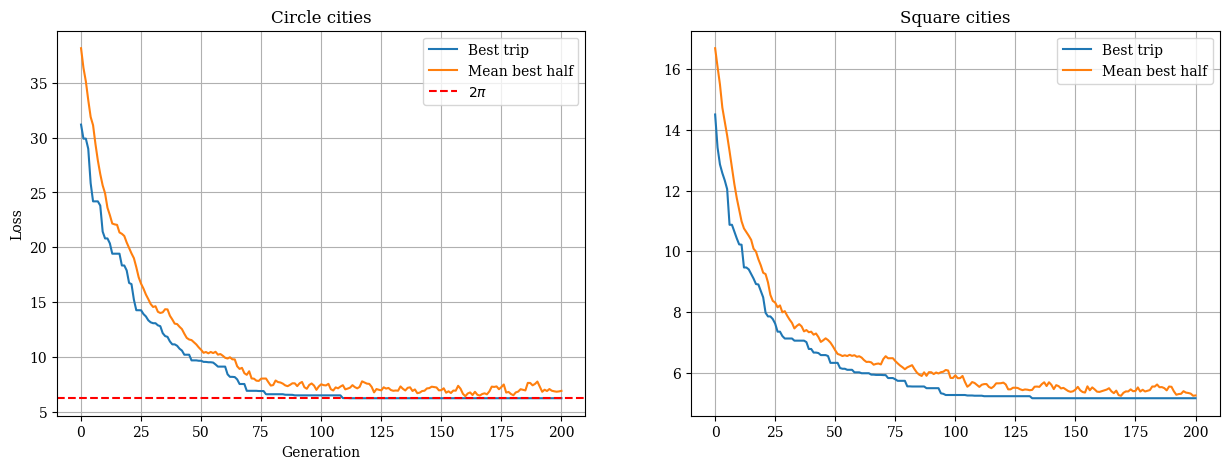

In [14]:
loss_circle = pd.read_csv('data/best_loss_circle.dat', sep = " ")
loss_square = pd.read_csv('data/best_loss_square.dat', sep = " ")
mean_loss_circle = pd.read_csv('data/mean_loss_circle.dat', sep = " ")
mean_loss_square = pd.read_csv('data/mean_loss_square.dat', sep = " ")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(loss_circle['Generation'], loss_circle['Loss'], label = 'Best trip')
ax[0].plot(mean_loss_circle['Generation'], mean_loss_circle['Mean_Loss'], label = 'Mean best half')
ax[0].axhline(y = 2*np.pi, color = 'r', linestyle = '--', label = r'$2\pi$')
ax[0].set_title('Circle cities')
ax[0].set_xlabel('Generation')
ax[0].set_ylabel('Loss')
ax[0].grid()
ax[0].legend()
ax[1].plot(loss_square['Generation'], loss_square['Loss'], label = 'Best trip')
ax[1].plot(mean_loss_square['Generation'], mean_loss_square['Mean_Loss'], label = 'Mean best half')
ax[1].set_title('Square cities')
ax[1].grid()
ax[1].legend()
plt.show()


In [15]:
print("Best loss at gen 200: " + loss_circle['Loss'].tail(1).to_string(index=False))
print("2PI: " + str(2*np.pi))

Best loss at gen 200: 6.25063
2PI: 6.283185307179586


For the circular configuration, we observe from the plot that after approximately one hundred generations, the loss stabilizes around a value slightly smaller than 
$2\pi$, which corresponds to the circumference of the unit circle. The optimal path is intuitively the one that follows the circumference in either a clockwise or counterclockwise direction. In our case, the loss is slightly lower because the path does not exactly follow the circle but rather an internal polygonal approximation of it.

Similarly, for the square configuration, the loss reaches a stationary value after about a hundred generations. Intuitively, the optimal path is expected to resemble a non-intersecting closed loop.

Let us now examine the optimal paths found by the algorithm at different generations.

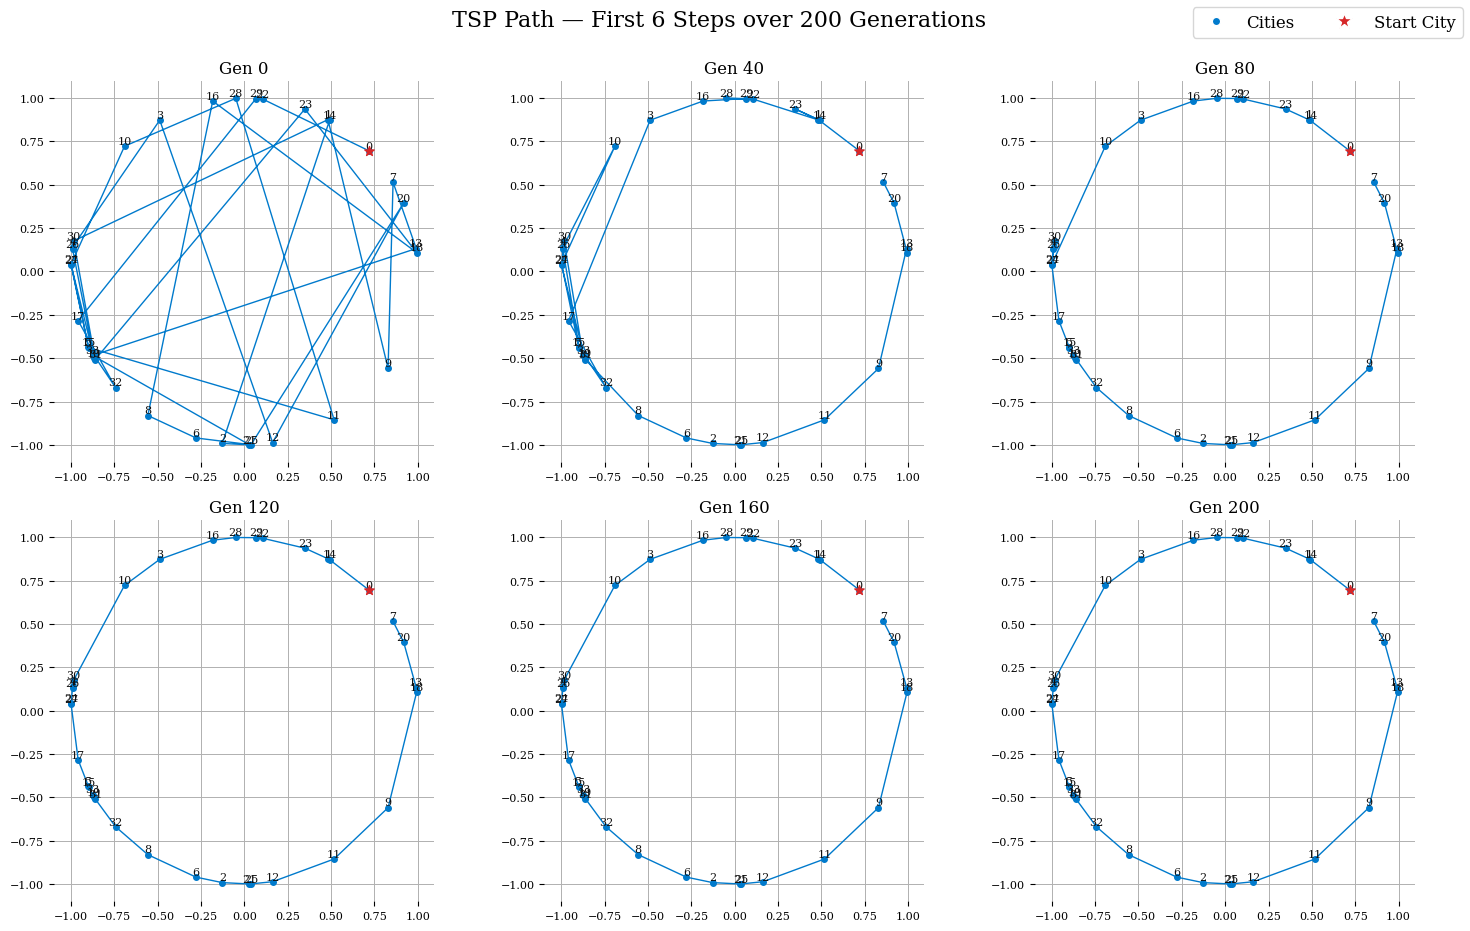

In [16]:
cities = pd.read_csv('data/cities_config_circle.dat', sep=" ")
trips = pd.read_csv('data/best_trip_circle.dat', sep=" ", skiprows=1, header=None)

gens = list(range(0, len(trips), 40))[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

path_color = '#007acc'
start_color = '#d62728'
text_color = '#111111'

for idx, gen in enumerate(gens):
    row = trips.iloc[gen]
    city_order = row[2:2 + 34].astype(int).values
    x = cities.loc[city_order, 'x'].values
    y = cities.loc[city_order, 'y'].values

    axes[idx].plot(x, y, '-o', color=path_color, linewidth=1, markersize=4)
    axes[idx].scatter(x[0], y[0], s=50, marker='*', color=start_color, zorder=5)

    for xi, yi, city_id in zip(x, y, city_order):
        axes[idx].text(xi, yi + 0.03, str(city_id), fontsize=8,
                       ha='center', va='center', color=text_color)

    axes[idx].set_title(f'Gen {int(row[0])}', fontsize=12)
    axes[idx].set_aspect('equal')
    axes[idx].grid(True, linestyle='-', linewidth=0.7)
    axes[idx].tick_params(labelsize=8)

    for spine in axes[idx].spines.values():
        spine.set_visible(False)

for idx in range(len(gens), len(axes)):
    axes[idx].axis('off')


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cities',
                          markerfacecolor=path_color, markersize=6),
                   Line2D([0], [0], marker='*', color='w', label='Start City',
                          markerfacecolor=start_color, markersize=12)]
fig.legend(handles=legend_elements, ncol=2, fontsize=12)

plt.suptitle(f'TSP Path — First 6 Steps over {len(trips)-1} Generations',
             fontsize=16, y=1.03)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


We observe that the path changes drastically after just 40 generations. After that point, adjustments become smaller and are mostly concentrated in regions where nearby cities can be swapped to yield slight improvements in the loss, which are quantitatively less significant compared to the early modifications.

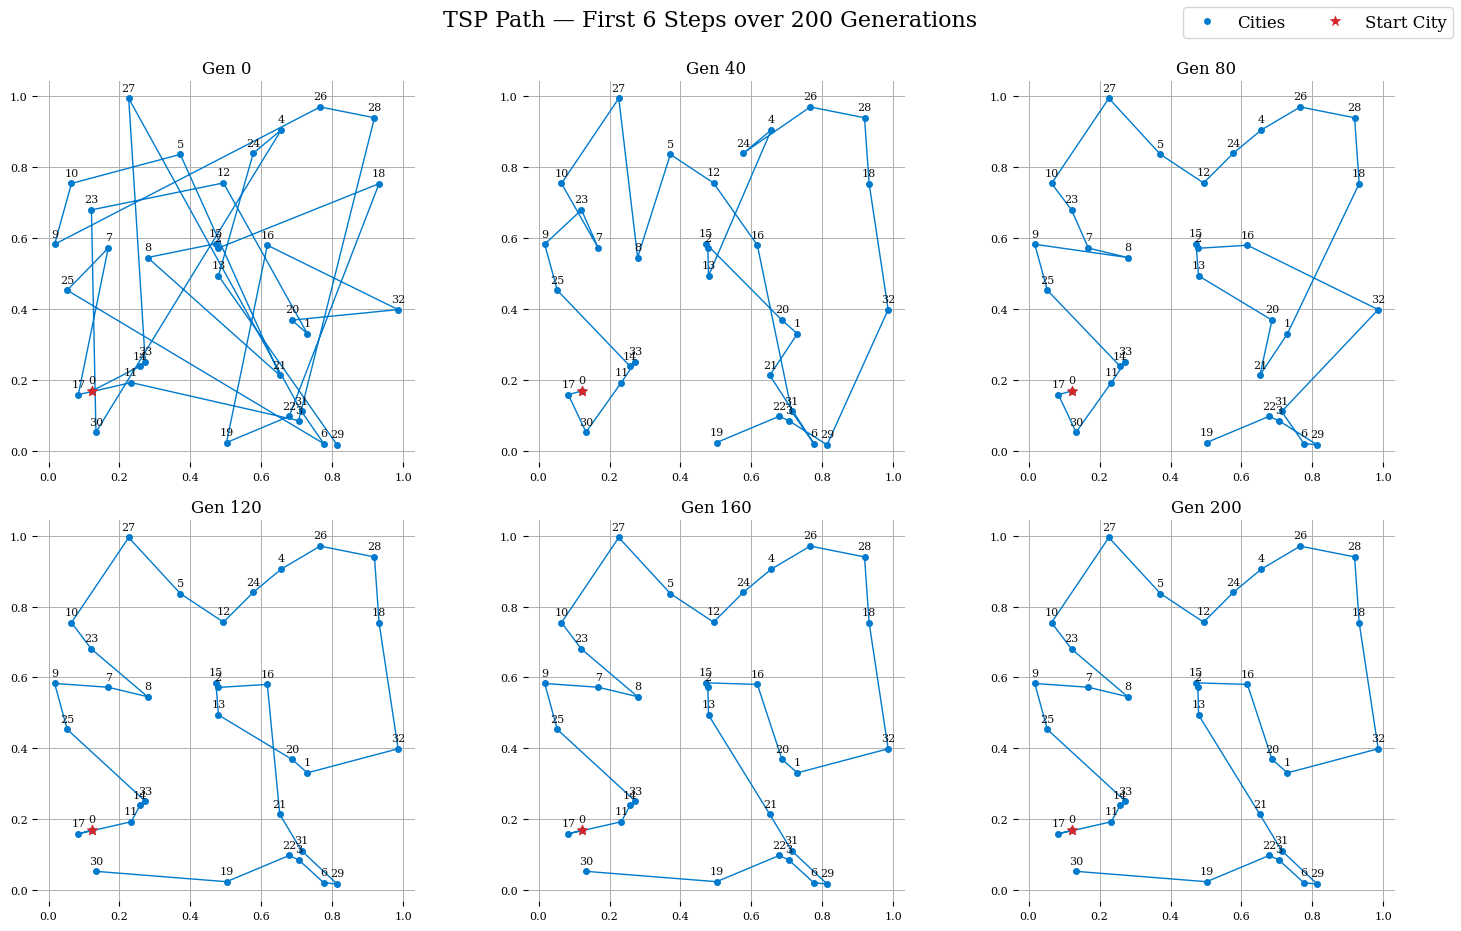

In [17]:
cities = pd.read_csv('data/cities_config_square.dat', sep=" ")
trips = pd.read_csv('data/best_trip_square.dat', sep=" ", skiprows=1, header=None)

gens = list(range(0, len(trips), 40))[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

path_color = '#007acc'
start_color = '#d62728'
text_color = '#111111'

for idx, gen in enumerate(gens):
    row = trips.iloc[gen]
    city_order = row[2:2 + 34].astype(int).values
    x = cities.loc[city_order, 'x'].values
    y = cities.loc[city_order, 'y'].values

    axes[idx].plot(x, y, '-o', color=path_color, linewidth=1, markersize=4)
    axes[idx].scatter(x[0], y[0], s=50, marker='*', color=start_color, zorder=5)

    for xi, yi, city_id in zip(x, y, city_order):
        axes[idx].text(xi, yi + 0.03, str(city_id), fontsize=8,
                       ha='center', va='center', color=text_color)

    axes[idx].set_title(f'Gen {int(row[0])}', fontsize=12)
    axes[idx].set_aspect('equal')
    axes[idx].grid(True, linestyle='-', linewidth=0.7)
    axes[idx].tick_params(labelsize=8)

    for spine in axes[idx].spines.values():
        spine.set_visible(False)

for idx in range(len(gens), len(axes)):
    axes[idx].axis('off')


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cities',
                          markerfacecolor=path_color, markersize=6),
                   Line2D([0], [0], marker='*', color='w', label='Start City',
                          markerfacecolor=start_color, markersize=12)]
fig.legend(handles=legend_elements, ncol=2, fontsize=12)

plt.suptitle(f'TSP Path — First 6 Steps over {len(trips)-1} Generations',
             fontsize=16, y=1.03)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

For the square configuration, we observe a behavior similar to the circular case: significant changes occur in the first generations, followed by smaller adjustments involving nearby cities. The optimal path found is the expected non-intersecting one.

*Disclaimer:* From the plots, it might seem that the traveler visits some cities more than once. This is due to overlapping lines between nearby cities and not an actual repetition. This can be visually confirmed from the raw data. Moreover, after each mutation or crossover, the function `GA::CheckTrip()` is called to ensure that the path satisfies the constraints of the problem.

To provide a visual understanding of the algorithm's optimization, I've included animated GIFs depicting the evolution of the paths.

In [18]:
# this is the code to generate the GIF of the TSP evolution

"""
config = "circle"
cities = pd.read_csv('data/cities_config_' + config + '.dat', sep=" ")
trips = pd.read_csv('data/best_trip_' + config + '.dat', sep=" ", skiprows=1, header=None)

gens = list(range(0, len(trips), 1))  

filenames = []

for gen in gens:
    row = trips.iloc[gen]
    city_order = row[2:2+34].astype(int).values
    x = cities.loc[city_order, 'x'].values
    y = cities.loc[city_order, 'y'].values

    plt.figure(figsize=(7,7))
    plt.plot(x, y, '-o')
    plt.scatter(x[0], y[0], s=80, marker='*', color='red')
    for xi, yi, city_id in zip(x, y, city_order):
        plt.text(xi, yi+0.01, str(city_id), fontsize=10, ha='center', va='bottom')
    plt.title(f'TSP path - Gen {int(row[0])}')
    plt.axis('equal')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')

    filename = f'_tmp_tsp_{gen}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

with imageio.get_writer('tsp_evolution' + config + '.gif', mode='I', duration=100.0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

for filename in filenames:
    os.remove(filename)

print(f"GIF salvata come tsp_evolution {config} .gif")
"""

'\nconfig = "circle"\ncities = pd.read_csv(\'data/cities_config_\' + config + \'.dat\', sep=" ")\ntrips = pd.read_csv(\'data/best_trip_\' + config + \'.dat\', sep=" ", skiprows=1, header=None)\n\ngens = list(range(0, len(trips), 1))  \n\nfilenames = []\n\nfor gen in gens:\n    row = trips.iloc[gen]\n    city_order = row[2:2+34].astype(int).values\n    x = cities.loc[city_order, \'x\'].values\n    y = cities.loc[city_order, \'y\'].values\n\n    plt.figure(figsize=(7,7))\n    plt.plot(x, y, \'-o\')\n    plt.scatter(x[0], y[0], s=80, marker=\'*\', color=\'red\')\n    for xi, yi, city_id in zip(x, y, city_order):\n        plt.text(xi, yi+0.01, str(city_id), fontsize=10, ha=\'center\', va=\'bottom\')\n    plt.title(f\'TSP path - Gen {int(row[0])}\')\n    plt.axis(\'equal\')\n    plt.grid()\n    plt.xlabel(\'x\')\n    plt.ylabel(\'y\')\n\n    filename = f\'_tmp_tsp_{gen}.png\'\n    plt.savefig(filename)\n    filenames.append(filename)\n    plt.close()\n\nwith imageio.get_writer(\'tsp_evoluti

<div style="display:flex; justify-content:center; gap: 30px;">
    <img src="tsp_evolutioncircle.gif" alt="Evoluzione Percorso 1" style="width:48%;">
    <img src="tsp_evolutionsquare.gif" alt="Evoluzione Percorso 2" style="width:48%;">
</div>